# Tensorflow APIs

TensorFlow provides tools to have full control of the computations. This is done with the low-level API. On top of that, TensorFlow is equipped with a vast array of APIs to perform many machine learning algorithms. This is the high-level API. TensorFlow calls them estimators.<br>

<b>Low-level API</b>: Build the architecture, optimization of the model from scratch. It is complicated for a beginner<br>
<b>High-level API</b>: Define the algorithm. It is easer-friendly. TensorFlow provides a toolbox calls estimator to construct, train, evaluate and make a prediction.

# Linear Regression

We will have a weight variable $\theta$ whose transpose $\theta ^ T$ will be multiplied with the input data $x$ and then compared with the output data $y$ and the square of difference will be used to adjust the weight $\theta$ to get the best outcome possible i.e. minimum square difference ($\theta^Tx - y$)

\begin{equation}
MSE(x) = \frac{1}{m} \sum_i^m (\theta ^ t x_i - y_i)
\end{equation}

here MSE : mean square error<br>
$x_i$ : the $i^{th}$ input example<br>
$y_i$ : the $i^{th}$ output value<br>
m : the number of input examples for training

Here we will use the <b>Gradient Descent</b> to optimize the difference

Here we will use high level API to build and train and evaluate our linear regression model. If low level API is used then we will need to do the following all on our own:
<ul>
    <li>Loss function</li>
    <li>Optimize: Gradient descent</li>
    <li>Matrices multiplication</li>
    <li>Graph and tensor</li>
</ul>


Tensorflow currently provides 6 pre-built estimators, including 3 for classification task and 3 for regression task:
<ul>
    <li>Regressor
    <ol>
        <li>DNNRegressor</li>
        <li>LinearRegressor</li>
        <li>DNNLineaCombinedRegressor</li>
    </ol></li>
    <li>Classifier
    <ol>
        <li>DNNClassifier</li>
        <li>LinearClassifier</li>
        <li>DNNLineaCombinedClassifier</li>
    </ol></li>
</ul>

# Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Dataset Naming
The name for this dataset is simply boston.

Miscellaneous Details
<ul>
    <li>Origin:The origin of the boston housing data is Natural.</li>
    <li>Usage:This dataset may be used for Assessment.</li>
    <li>Number of Cases:The dataset contains a total of 506 cases.</li>
    <li>Order:The order of the cases is mysterious.</li>
    <li>Variables:There are 10 attributes in each case of the dataset. They are:
    <ul>
        <li>CRIM - per capita crime rate by town</li>
        <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
        <li>INDUS - proportion of non-retail business acres per town.</li>
        <li>NOX - nitric oxides concentration (parts per 10 million)</li>
        <li>RM - average number of rooms per dwelling</li>
        <li>AGE - proportion of owner-occupied units built prior to 1940</li>
        <li>DIS - weighted distances to five Boston employment centres</li>
        <li>TAX - full-value property-tax rate per \$10,000</li>
        <li>PTRATIO - pupil-teacher ratio by town</li>
        <li>MEDV - Median value of owner-occupied homes in \$1000's</li>
        <ul>
</ul>

# Program Example

In [6]:
from IPython.display import display, HTML     #will be used to display pandas dataframe nicely in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [51]:
#reading the data
model_dir = 'logs/7_linear_reg'
data_dir = 'data/boston_housing/'
COLUMNS = ["crim", "zn", "indus", "nox", "rm", "age","dis", "tax", "ptratio", "medv"]
label = 'medv' #data wehich we have to predict
feature_cols = COLUMNS.copy()
feature_cols.remove(label)

train_set = pd.read_csv('data/boston_housing/boston_train.csv',skiprows=1, names=COLUMNS)
test_set = pd.read_csv('data/boston_housing/boston_test.csv',skiprows=1, names=COLUMNS)
prediction_set = pd.read_csv('data/boston_housing/boston_predict.csv',skiprows=1, names=COLUMNS)

In [3]:
print(train_set.shape)
print(test_set.shape)
print(prediction_set.shape)

(400, 10)
(100, 10)
(6, 10)


In [4]:
display(train_set[:10])  #displaying top 10 results

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,medv
0,2.30040,0.0,19.58,0.6050,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.6930,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.4480,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.4130,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.4040,7.274,38.3,7.3090,329,12.6,34.6
5,0.03705,20.0,3.33,0.4429,6.968,37.2,5.2447,216,14.9,35.4
6,0.07244,60.0,1.69,0.4110,5.884,18.5,10.7103,411,18.3,18.6
7,0.10000,34.0,6.09,0.4330,6.982,17.7,5.4917,329,16.1,33.1
8,4.81213,0.0,18.10,0.7130,6.701,90.0,2.5975,666,20.2,16.4
9,0.15086,0.0,27.74,0.6090,5.454,92.7,1.8209,711,20.1,15.2


<Figure size 432x288 with 0 Axes>

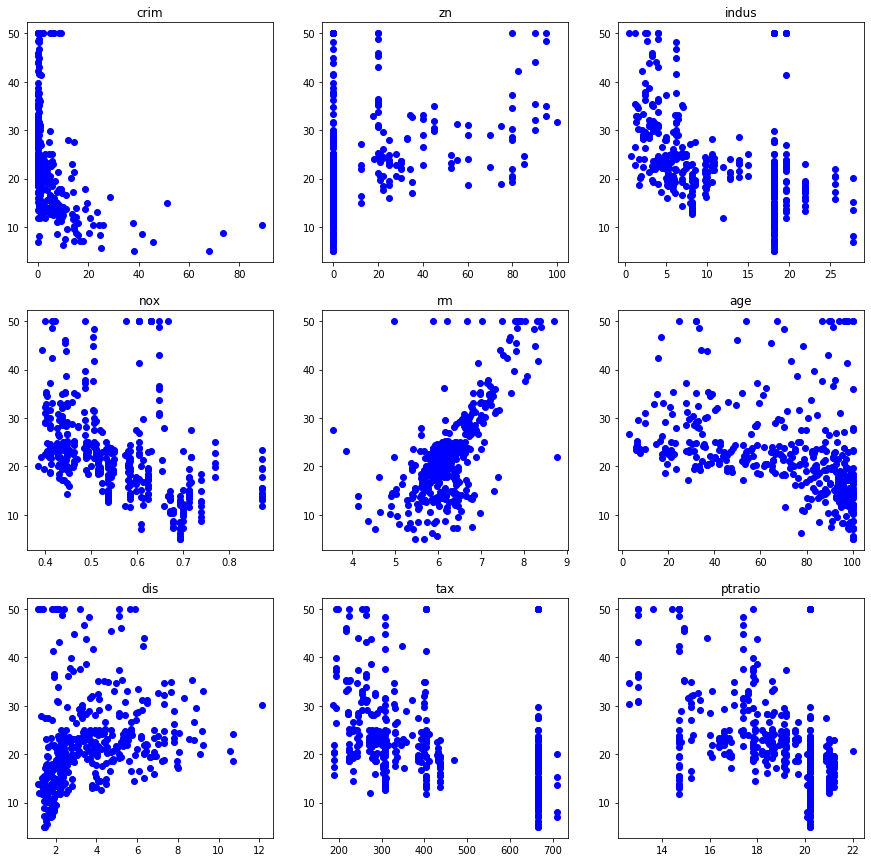

In [52]:
# Observing the data
plt.suptitle('Boston Data')
plt.figure(figsize=(15,15))

for col in feature_cols:
    i = feature_cols.index(col)
    plt.subplot(3,3,i+1)
    plt.plot(train_set[col], train_set[label],'bo')
    plt.title(col)

plt.show()


In [59]:
#creating the model
estimator = tf.estimator.LinearRegressor(feature_columns = COLUMNS, model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/7_linear_reg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efee63f1d10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
